In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
data = pd.read_excel('../data/ANC_Raw.xlsx')
data.head()

,Age,\nEducational status,Marital status,\nResidence,Religion,Monthly income,Occupation,Husband's educational qualification,Media access,Distance to a health facility,\nPregnancy intension,Did you attend ANC visit during your last pregnancy within 3 months?,Who encouraged you to attend antenatal care visit?,Who took the decision for health care service?,Time to first antenatal care visit,ANC Visit,Parity,Total family members,Did you experience miscarriage before last pregnancy?
0,24,Secondary,Married,Rural,Muslim,Less than 20000 tk,Not working,Secondary,No,Not a big problem,Intended,No,Family,Respondent and husband,5.0,Yes,2,4,No
1,40,Primary,Married,Rural,Muslim,Less than 20000 tk,Not working,Primary,No,Not a big problem,Unintended,No,Family,Respondent and husband,9.0,Yes,4,5,Yes
2,20,Secondary,Married,Rural,Hindu,20000-40000,Not working,Higher secondary,Yes,Not a big problem,Unintended,No,Family,Respondent and husband,4.0,Yes,2,7,No
3,28,Higher secondary,Married,Rural,Hindu,20000-40000,Working,Higher secondary,Yes,Not a big problem,Intended,No,Family,Respondent and husband,4.5,Yes,3,5,No
4,38,Primary,Married,Rural,Muslim,Less than 20000 tk,Not working,Primary,No,Not a big problem,Unintended,Yes,Family,Respondent alone,2.0,Yes,3,5,No


In [3]:
# Clean Column Names
data.columns = data.columns.str.strip().str.replace('\\n', ' ')
data.head()

,Age,Educational status,Marital status,Residence,Religion,Monthly income,Occupation,Husband's educational qualification,Media access,Distance to a health facility,Pregnancy intension,Did you attend ANC visit during your last pregnancy within 3 months?,Who encouraged you to attend antenatal care visit?,Who took the decision for health care service?,Time to first antenatal care visit,ANC Visit,Parity,Total family members,Did you experience miscarriage before last pregnancy?
0,24,Secondary,Married,Rural,Muslim,Less than 20000 tk,Not working,Secondary,No,Not a big problem,Intended,No,Family,Respondent and husband,5.0,Yes,2,4,No
1,40,Primary,Married,Rural,Muslim,Less than 20000 tk,Not working,Primary,No,Not a big problem,Unintended,No,Family,Respondent and husband,9.0,Yes,4,5,Yes
2,20,Secondary,Married,Rural,Hindu,20000-40000,Not working,Higher secondary,Yes,Not a big problem,Unintended,No,Family,Respondent and husband,4.0,Yes,2,7,No
3,28,Higher secondary,Married,Rural,Hindu,20000-40000,Working,Higher secondary,Yes,Not a big problem,Intended,No,Family,Respondent and husband,4.5,Yes,3,5,No
4,38,Primary,Married,Rural,Muslim,Less than 20000 tk,Not working,Primary,No,Not a big problem,Unintended,Yes,Family,Respondent alone,2.0,Yes,3,5,No


In [4]:
# Renaming and Reordering Columns
data = data.rename(columns={
    'Age': 'age_group',
    'Educational status': 'educational_status',
    'Marital status': 'marital_status',
    'Residence': 'residence',
    'Religion': 'religion',
    'Monthly income': 'monthly_income',
    'Occupation': 'occupation',
    "Husband's educational qualification": 'husband_education',
    'Media access': 'media_exposure',
    'Distance to a health facility': 'distance_to_clinic',
    'Pregnancy intension': 'intended_pregnancy',
    'Did you attend ANC visit during your last pregnancy within 3 months?': 'attended_anc_early',
    'Who encouraged you to attend antenatal care visit?': 'anc_encouragement',
    'Who took the decision for health care service?': 'healthcare_decision_maker',
    'Parity': 'number_of_children',
    'Total family members': 'family_size',
    'Did you experience miscarriage before last pregnancy?': 'miscarriage_experience'
})

column_order = [
    # Demographics
    'age_group',
    'educational_status',
    'marital_status',
    'residence',
    'religion',

    # Socioeconomic factors
    'monthly_income',
    'occupation',
    'husband_education',
    'media_exposure',

    # Healthcare access & decision-making
    'distance_to_clinic',
    'anc_encouragement',
    'healthcare_decision_maker',

    # Reproductive & family factors
    'intended_pregnancy',
    'number_of_children',
    'family_size',
    'miscarriage_experience',

    # Outcome variable
    'attended_anc_early'
]

data = data.loc[:, column_order]
data.head()

,age_group,educational_status,marital_status,residence,religion,monthly_income,occupation,husband_education,media_exposure,distance_to_clinic,anc_encouragement,healthcare_decision_maker,intended_pregnancy,number_of_children,family_size,miscarriage_experience,attended_anc_early
0,24,Secondary,Married,Rural,Muslim,Less than 20000 tk,Not working,Secondary,No,Not a big problem,Family,Respondent and husband,Intended,2,4,No,No
1,40,Primary,Married,Rural,Muslim,Less than 20000 tk,Not working,Primary,No,Not a big problem,Family,Respondent and husband,Unintended,4,5,Yes,No
2,20,Secondary,Married,Rural,Hindu,20000-40000,Not working,Higher secondary,Yes,Not a big problem,Family,Respondent and husband,Unintended,2,7,No,No
3,28,Higher secondary,Married,Rural,Hindu,20000-40000,Working,Higher secondary,Yes,Not a big problem,Family,Respondent and husband,Intended,3,5,No,No
4,38,Primary,Married,Rural,Muslim,Less than 20000 tk,Not working,Primary,No,Not a big problem,Family,Respondent alone,Unintended,3,5,No,Yes


In [5]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age_group                  631 non-null    int64 
 1   educational_status         631 non-null    object
 2   marital_status             631 non-null    object
 3   residence                  631 non-null    object
 4   religion                   631 non-null    object
 5   monthly_income             631 non-null    object
 6   occupation                 631 non-null    object
 7   husband_education          631 non-null    object
 8   media_exposure             631 non-null    object
 9   distance_to_clinic         631 non-null    object
 10  anc_encouragement          631 non-null    object
 11  healthcare_decision_maker  631 non-null    object
 12  intended_pregnancy         631 non-null    object
 13  number_of_children         631 non-null    int64 
 14  family_siz

In [6]:
# categorize the age group
data['age_group'] = pd.cut(data['age_group'],
                           bins=[15, 25, 35, 50],
                           labels = ['15-24', '25-34', '35-49'])
data.head()

,age_group,educational_status,marital_status,residence,religion,monthly_income,occupation,husband_education,media_exposure,distance_to_clinic,anc_encouragement,healthcare_decision_maker,intended_pregnancy,number_of_children,family_size,miscarriage_experience,attended_anc_early
0,15-24,Secondary,Married,Rural,Muslim,Less than 20000 tk,Not working,Secondary,No,Not a big problem,Family,Respondent and husband,Intended,2,4,No,No
1,35-49,Primary,Married,Rural,Muslim,Less than 20000 tk,Not working,Primary,No,Not a big problem,Family,Respondent and husband,Unintended,4,5,Yes,No
2,15-24,Secondary,Married,Rural,Hindu,20000-40000,Not working,Higher secondary,Yes,Not a big problem,Family,Respondent and husband,Unintended,2,7,No,No
3,25-34,Higher secondary,Married,Rural,Hindu,20000-40000,Working,Higher secondary,Yes,Not a big problem,Family,Respondent and husband,Intended,3,5,No,No
4,35-49,Primary,Married,Rural,Muslim,Less than 20000 tk,Not working,Primary,No,Not a big problem,Family,Respondent alone,Unintended,3,5,No,Yes


In [7]:
# categorize family size
data['family_size'] = pd.cut(data['family_size'],
                           bins=[2, 5, 9, 17],
                           labels = ['2-4', '5-8', '9-16'])
data.head()

,age_group,educational_status,marital_status,residence,religion,monthly_income,occupation,husband_education,media_exposure,distance_to_clinic,anc_encouragement,healthcare_decision_maker,intended_pregnancy,number_of_children,family_size,miscarriage_experience,attended_anc_early
0,15-24,Secondary,Married,Rural,Muslim,Less than 20000 tk,Not working,Secondary,No,Not a big problem,Family,Respondent and husband,Intended,2,2-4,No,No
1,35-49,Primary,Married,Rural,Muslim,Less than 20000 tk,Not working,Primary,No,Not a big problem,Family,Respondent and husband,Unintended,4,2-4,Yes,No
2,15-24,Secondary,Married,Rural,Hindu,20000-40000,Not working,Higher secondary,Yes,Not a big problem,Family,Respondent and husband,Unintended,2,5-8,No,No
3,25-34,Higher secondary,Married,Rural,Hindu,20000-40000,Working,Higher secondary,Yes,Not a big problem,Family,Respondent and husband,Intended,3,2-4,No,No
4,35-49,Primary,Married,Rural,Muslim,Less than 20000 tk,Not working,Primary,No,Not a big problem,Family,Respondent alone,Unintended,3,2-4,No,Yes


In [8]:
# categorize number of childrens
data['number_of_children'] = pd.cut(data['number_of_children'],
                           bins=[0, 2, 5],
                           labels = ['1-2', '3+'])
data.head()

,age_group,educational_status,marital_status,residence,religion,monthly_income,occupation,husband_education,media_exposure,distance_to_clinic,anc_encouragement,healthcare_decision_maker,intended_pregnancy,number_of_children,family_size,miscarriage_experience,attended_anc_early
0,15-24,Secondary,Married,Rural,Muslim,Less than 20000 tk,Not working,Secondary,No,Not a big problem,Family,Respondent and husband,Intended,1-2,2-4,No,No
1,35-49,Primary,Married,Rural,Muslim,Less than 20000 tk,Not working,Primary,No,Not a big problem,Family,Respondent and husband,Unintended,3+,2-4,Yes,No
2,15-24,Secondary,Married,Rural,Hindu,20000-40000,Not working,Higher secondary,Yes,Not a big problem,Family,Respondent and husband,Unintended,1-2,5-8,No,No
3,25-34,Higher secondary,Married,Rural,Hindu,20000-40000,Working,Higher secondary,Yes,Not a big problem,Family,Respondent and husband,Intended,3+,2-4,No,No
4,35-49,Primary,Married,Rural,Muslim,Less than 20000 tk,Not working,Primary,No,Not a big problem,Family,Respondent alone,Unintended,3+,2-4,No,Yes


In [9]:
# show the columns
data.columns

Index(['age_group', 'educational_status', 'marital_status', 'residence',
       'religion', 'monthly_income', 'occupation', 'husband_education',
       'media_exposure', 'distance_to_clinic', 'anc_encouragement',
       'healthcare_decision_maker', 'intended_pregnancy', 'number_of_children',
       'family_size', 'miscarriage_experience', 'attended_anc_early'],
      dtype='object')

In [10]:
# check shape of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age_group                  631 non-null    category
 1   educational_status         631 non-null    object  
 2   marital_status             631 non-null    object  
 3   residence                  631 non-null    object  
 4   religion                   631 non-null    object  
 5   monthly_income             631 non-null    object  
 6   occupation                 631 non-null    object  
 7   husband_education          631 non-null    object  
 8   media_exposure             631 non-null    object  
 9   distance_to_clinic         631 non-null    object  
 10  anc_encouragement          631 non-null    object  
 11  healthcare_decision_maker  631 non-null    object  
 12  intended_pregnancy         631 non-null    object  
 13  number_of_children         631 non-

In [11]:
# check missing values
data.isnull().sum()

age_group                    0
educational_status           0
marital_status               0
residence                    0
religion                     0
monthly_income               0
occupation                   0
husband_education            0
media_exposure               0
distance_to_clinic           0
anc_encouragement            0
healthcare_decision_maker    0
intended_pregnancy           0
number_of_children           0
family_size                  6
miscarriage_experience       0
attended_anc_early           0
dtype: int64

In [12]:
# Handle Missing Values
data = data.dropna()

In [13]:
# export non-coded data for explainable modeling
data.to_excel('../data/ANC_NonCoded.xlsx', index=False)

In [14]:
# Convert 'attended_anc_early' to binary (0 = No, 1 = Yes)
data['attended_anc_early'] = data['attended_anc_early'].map({'Yes': 1, 'No': 0})
data.head()

,age_group,educational_status,marital_status,residence,religion,monthly_income,occupation,husband_education,media_exposure,distance_to_clinic,anc_encouragement,healthcare_decision_maker,intended_pregnancy,number_of_children,family_size,miscarriage_experience,attended_anc_early
0,15-24,Secondary,Married,Rural,Muslim,Less than 20000 tk,Not working,Secondary,No,Not a big problem,Family,Respondent and husband,Intended,1-2,2-4,No,0
1,35-49,Primary,Married,Rural,Muslim,Less than 20000 tk,Not working,Primary,No,Not a big problem,Family,Respondent and husband,Unintended,3+,2-4,Yes,0
2,15-24,Secondary,Married,Rural,Hindu,20000-40000,Not working,Higher secondary,Yes,Not a big problem,Family,Respondent and husband,Unintended,1-2,5-8,No,0
3,25-34,Higher secondary,Married,Rural,Hindu,20000-40000,Working,Higher secondary,Yes,Not a big problem,Family,Respondent and husband,Intended,3+,2-4,No,0
4,35-49,Primary,Married,Rural,Muslim,Less than 20000 tk,Not working,Primary,No,Not a big problem,Family,Respondent alone,Unintended,3+,2-4,No,1


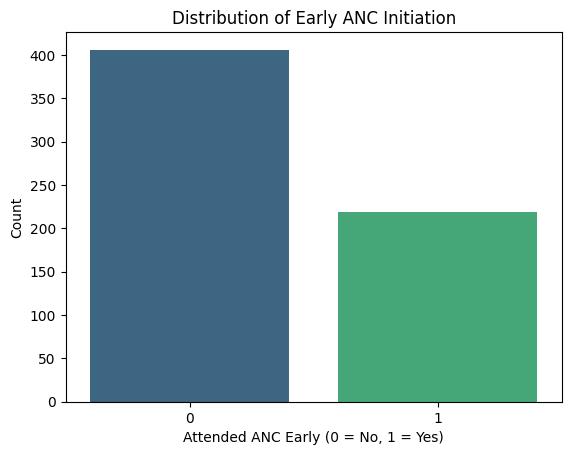

In [15]:
# Visualize the distribution of the 'target' column
sns.countplot(x=data['attended_anc_early'], palette="viridis")
plt.title("Distribution of Early ANC Initiation")
plt.xlabel("Attended ANC Early (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [16]:
data.columns

Index(['age_group', 'educational_status', 'marital_status', 'residence',
       'religion', 'monthly_income', 'occupation', 'husband_education',
       'media_exposure', 'distance_to_clinic', 'anc_encouragement',
       'healthcare_decision_maker', 'intended_pregnancy', 'number_of_children',
       'family_size', 'miscarriage_experience', 'attended_anc_early'],
      dtype='object')

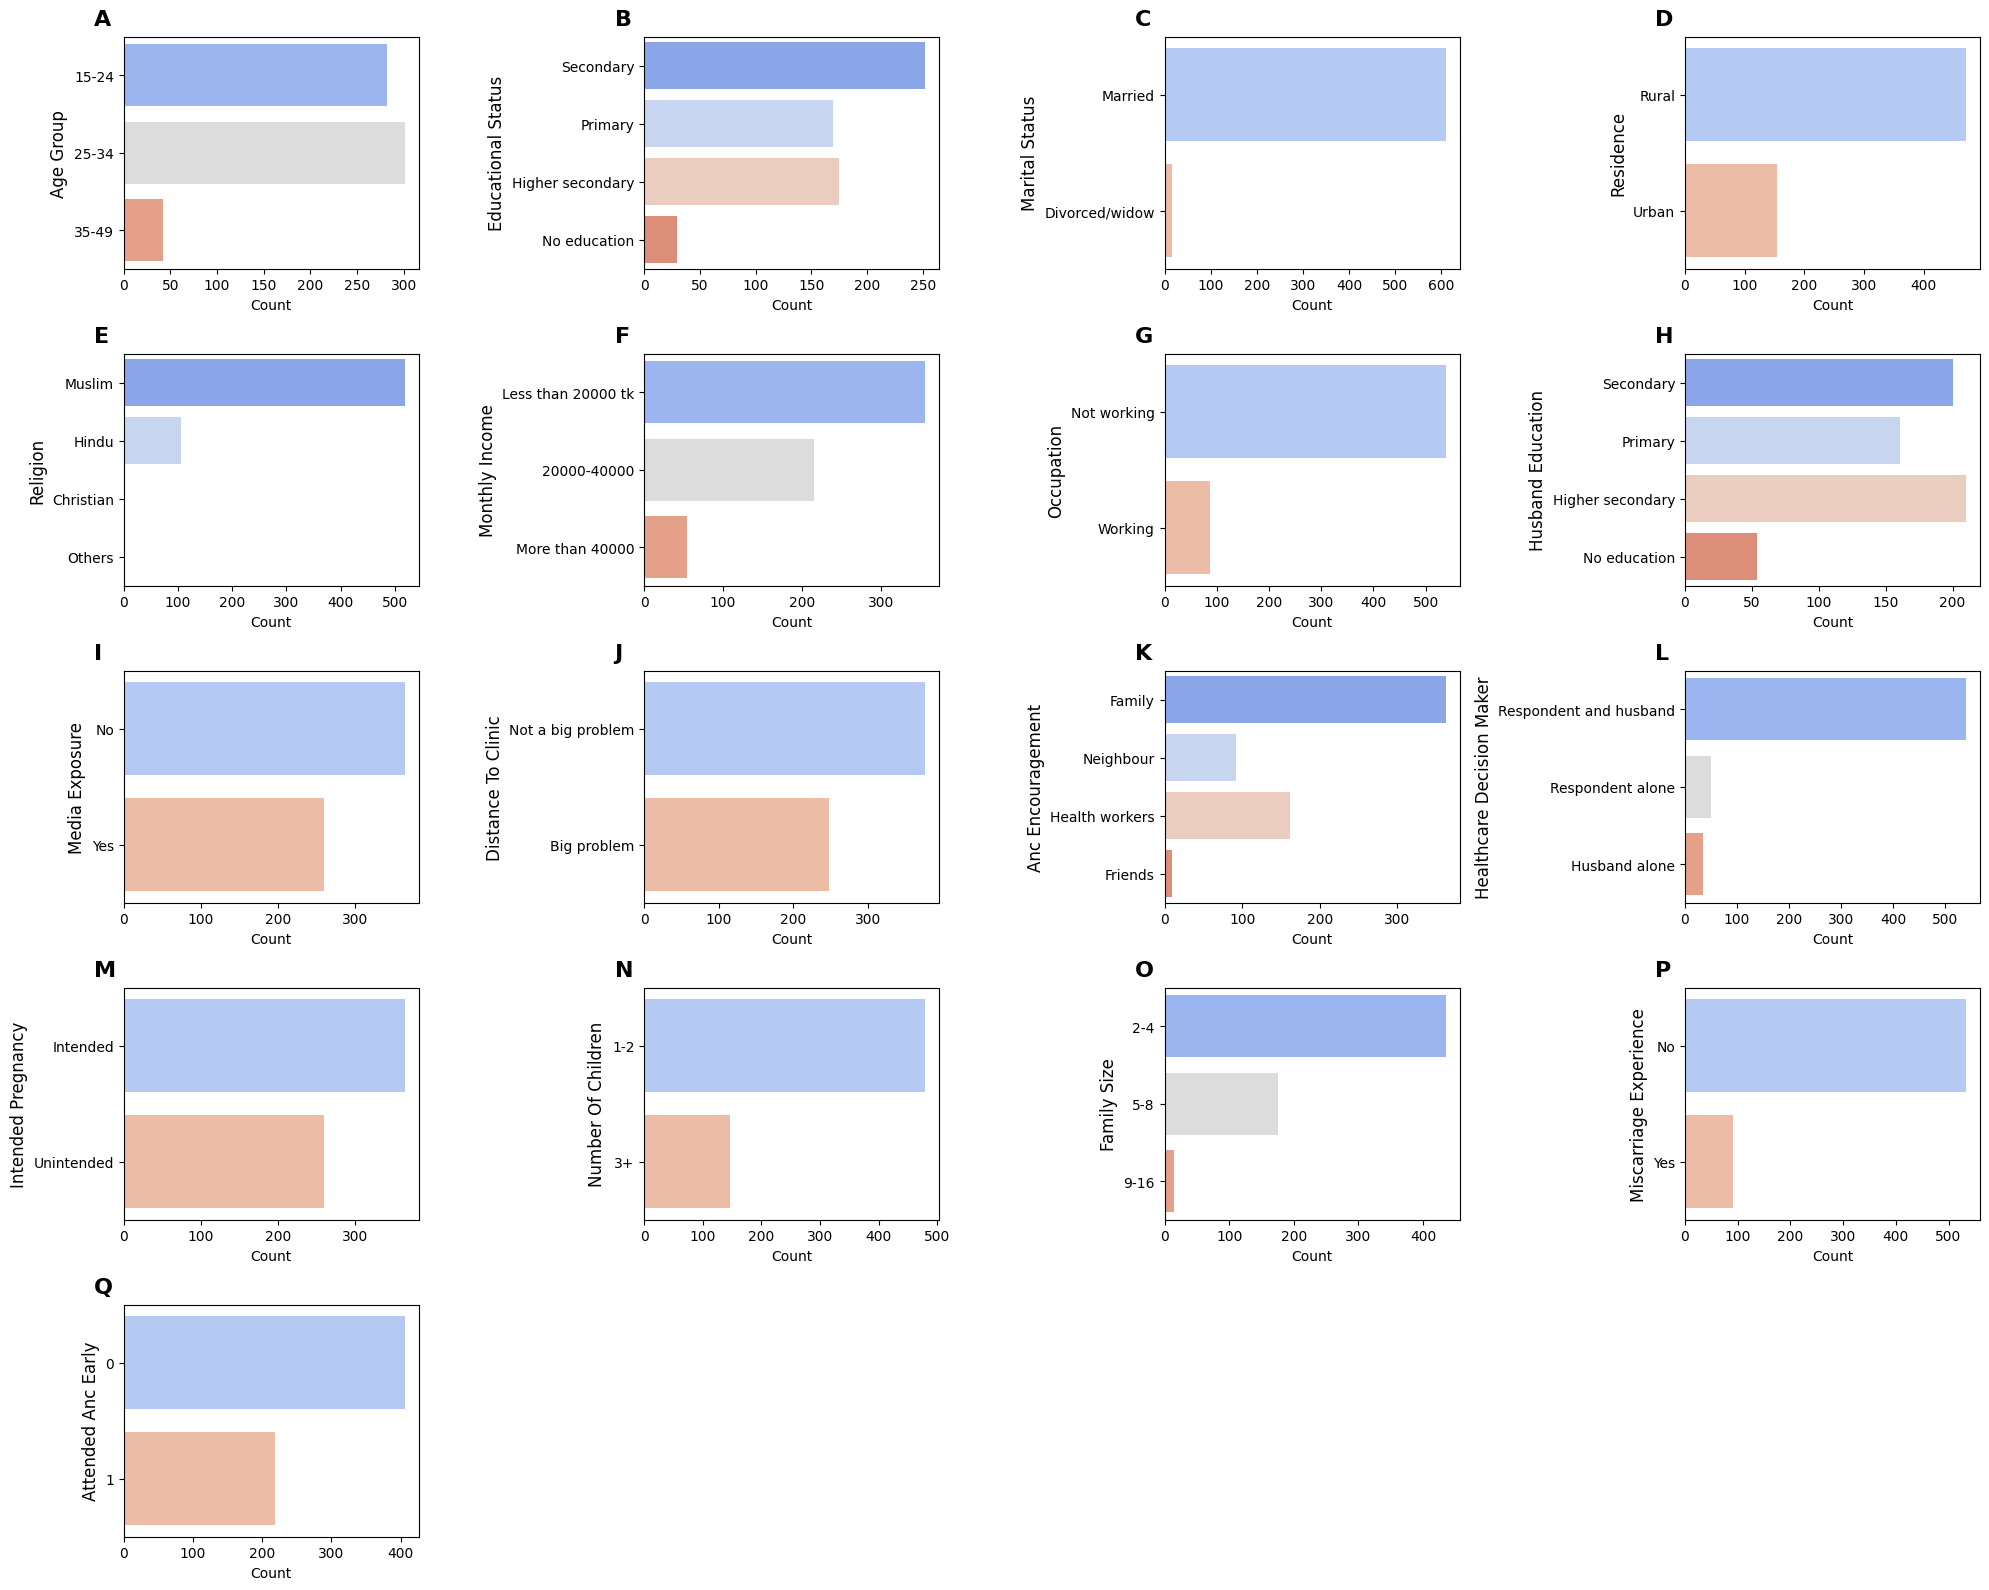

In [17]:
# List of columns
columns = ['age_group', 'educational_status', 'marital_status', 'residence',
           'religion', 'monthly_income', 'occupation', 'husband_education',
           'media_exposure', 'distance_to_clinic', 'anc_encouragement',
           'healthcare_decision_maker', 'intended_pregnancy', 'number_of_children',
           'family_size', 'miscarriage_experience', 'attended_anc_early']

# Number of subplots
n_cols = 4  # Adjust the number of columns per row
n_rows = (len(columns) + n_cols - 1) // n_cols  # Dynamically calculate the number of rows

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))
axes = axes.flatten()

# Plot categorical feature distributions
for i, col in enumerate(columns):
    sns.countplot(y=data[col], ax=axes[i], palette="coolwarm")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(col.replace('_', ' ').title(), fontsize=12)  # Add column name as Y-axis label

    # Add labels (A, B, C...) to the figure
    label = chr(65 + i)  # Convert the index to a letter (A = 65 in ASCII)
    axes[i].text(-0.1, 1.05, label, transform=axes[i].transAxes, fontsize=16, fontweight='bold')

# Hide unused axes if any
for i in range(len(columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
# Save the figure as a PDF
plt.savefig('categorical_feature_distributions.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [19]:
# Convert the 'category' columns to 'object'
data['age_group'] = data['age_group'].astype('object')
data['number_of_children'] = data['number_of_children'].astype('object')
data['family_size'] = data['family_size'].astype('object')

In [20]:
# Encode Categorical Variables
cat_cols = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

In [21]:
# Define Features and Target
X = data.drop('attended_anc_early', axis=1)
y = data['attended_anc_early']

In [22]:
# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

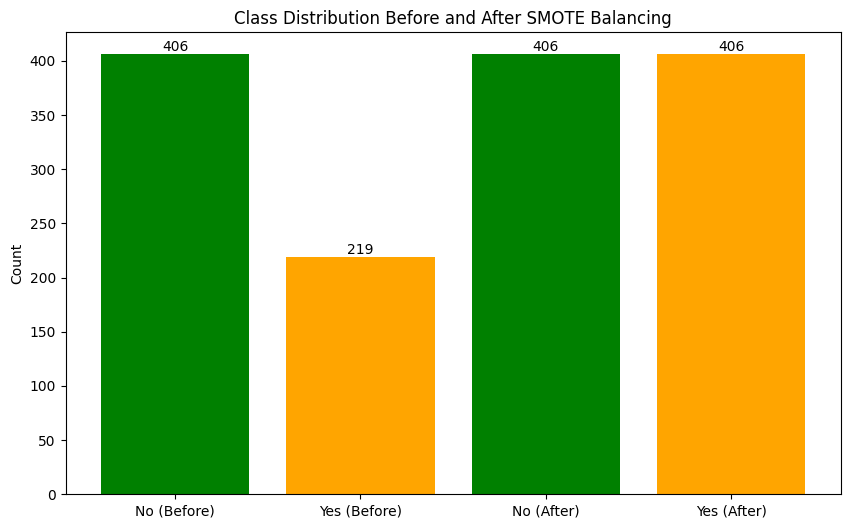

In [23]:
# Combined Visualization Before and After SMOTE
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
counts_before = y.value_counts()
counts_after = pd.Series(y_smote).value_counts()
bars = ax.bar(['No (Before)', 'Yes (Before)', 'No (After)', 'Yes (After)'],
              [counts_before[0], counts_before[1], counts_after[0], counts_after[1]],
              color=['green', 'orange', 'green', 'orange'])

# Annotate the bars with counts
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

ax.set_title('Class Distribution Before and After SMOTE Balancing')
ax.set_ylabel('Count')
plt.savefig("SMOTE.png")
plt.show()

In [24]:
data.columns

Index(['age_group', 'educational_status', 'marital_status', 'residence',
       'religion', 'monthly_income', 'occupation', 'husband_education',
       'media_exposure', 'distance_to_clinic', 'anc_encouragement',
       'healthcare_decision_maker', 'intended_pregnancy', 'number_of_children',
       'family_size', 'miscarriage_experience', 'attended_anc_early'],
      dtype='object')

In [25]:
# Combine back into a single DataFrame
data_smote = pd.DataFrame(X_smote, columns=X.columns)
data_smote['attended_anc_early'] = y_smote
data_smote.head()

,age_group,educational_status,marital_status,residence,religion,monthly_income,occupation,husband_education,media_exposure,distance_to_clinic,anc_encouragement,healthcare_decision_maker,intended_pregnancy,number_of_children,family_size,miscarriage_experience,attended_anc_early
0,0,3,1,0,2,1,0,3,0,1,0,2,0,0,0,0,0
1,2,2,1,0,2,1,0,2,0,1,0,2,1,1,0,1,0
2,0,3,1,0,1,0,0,0,1,1,0,2,1,0,1,0,0
3,1,0,1,0,1,0,1,0,1,1,0,2,0,1,0,0,0
4,2,2,1,0,2,1,0,2,0,1,0,1,1,1,0,0,1


In [29]:
# export smote data
data_smote.to_excel('../data/ANC_SMOTE.xlsx', index=False)

In [30]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data = data_smote, target = 'attended_anc_early',
          session_id = 123, train_size=0.8)

,Description,Value
0,Session id,123
1,Target,attended_anc_early
2,Target type,Binary
3,Original data shape,"(812, 17)"
4,Transformed data shape,"(812, 17)"
5,Transformed train set shape,"(649, 17)"
6,Transformed test set shape,"(163, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [31]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [32]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7611,0.8344,0.7816,0.7568,0.7670,0.5222,0.5252,0.0300
catboost,CatBoost Classifier,0.7610,0.8347,0.7690,0.7603,0.7637,0.5221,0.5235,0.3850
lightgbm,Light Gradient Boosting Machine,0.7549,0.8285,0.7781,0.7459,0.7606,0.5097,0.5116,0.0510
et,Extra Trees Classifier,0.7503,0.8251,0.7633,0.7506,0.7535,0.5006,0.5047,0.0280
gbc,Gradient Boosting Classifier,0.7457,0.8117,0.7722,0.7360,0.7527,0.4913,0.4933,0.0190
knn,K Neighbors Classifier,0.7225,0.7920,0.7938,0.6985,0.7421,0.4443,0.4496,0.0200
ada,Ada Boost Classifier,0.7117,0.7896,0.7202,0.7118,0.7149,0.4235,0.4249,0.0180
lda,Linear Discriminant Analysis,0.7025,0.7759,0.7233,0.6968,0.7091,0.4053,0.4064,0.0050
lr,Logistic Regression,0.7010,0.7786,0.7202,0.6954,0.7072,0.4021,0.4028,0.0060
ridge,Ridge Classifier,0.7010,0.7753,0.7233,0.6949,0.7081,0.4022,0.4033,0.0050


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [33]:
# create best model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8409,0.7812,0.8065,0.7937,0.5997,0.6000
1,0.7385,0.8258,0.8125,0.7027,0.7536,0.4780,0.4838
2,0.8923,0.9219,0.8750,0.9032,0.8889,0.7845,0.7848
3,0.6615,0.7741,0.7188,0.6389,0.6765,0.3242,0.3267
4,0.7538,0.7704,0.8182,0.7297,0.7714,0.5066,0.5105
5,0.7538,0.8092,0.7879,0.7429,0.7647,0.5071,0.5081
6,0.7385,0.8409,0.8182,0.7105,0.7606,0.4756,0.4813
7,0.8000,0.9233,0.7879,0.8125,0.8000,0.6001,0.6004
8,0.7538,0.8291,0.6667,0.8148,0.7333,0.5090,0.5178


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [34]:
# print model parameters
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [35]:
# tune hyperparameters of rf
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7846,0.8404,0.7500,0.8000,0.7742,0.5687,0.5698
1,0.7385,0.7893,0.7188,0.7419,0.7302,0.4766,0.4768
2,0.8000,0.8996,0.7500,0.8276,0.7869,0.5993,0.6019
3,0.7231,0.7860,0.7500,0.7059,0.7273,0.4465,0.4474
4,0.7538,0.8049,0.7273,0.7742,0.7500,0.5080,0.5090
5,0.7385,0.7992,0.6970,0.7667,0.7302,0.4775,0.4796
6,0.7231,0.7367,0.6970,0.7419,0.7188,0.4465,0.4474
7,0.7385,0.8883,0.6667,0.7857,0.7213,0.4780,0.4838
8,0.7538,0.8442,0.6667,0.8148,0.7333,0.5090,0.5178


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [36]:
# print tuned parameters
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [37]:
# to access the tuner object you can set return_tuner = True
tuned_rf, tuner = tune_model(rf, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7846,0.8404,0.7500,0.8000,0.7742,0.5687,0.5698
1,0.7385,0.7893,0.7188,0.7419,0.7302,0.4766,0.4768
2,0.8000,0.8996,0.7500,0.8276,0.7869,0.5993,0.6019
3,0.7231,0.7860,0.7500,0.7059,0.7273,0.4465,0.4474
4,0.7538,0.8049,0.7273,0.7742,0.7500,0.5080,0.5090
5,0.7385,0.7992,0.6970,0.7667,0.7302,0.4775,0.4796
6,0.7231,0.7367,0.6970,0.7419,0.7188,0.4465,0.4474
7,0.7385,0.8883,0.6667,0.7857,0.7213,0.4780,0.4838
8,0.7538,0.8442,0.6667,0.8148,0.7333,0.5090,0.5178


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [38]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [39]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['age_group',
                                                                          'educational_status',
                                                                          'marital_status',
                                                                          'residence',
                                                                          'religion',
                                                                          'monthly_income',
                                                                          'occupation',
                                                                          'husband_education',
                                                                          'media_expo...
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140,
                                                                           150,
                                                                           160,
                                                                           170,
                                                                           180,
                                                                           190,
                                                                           200,
                                                                           210,
                                                                           220,
                                                                           230,
                                                                           240,
                                                                           250,
                                 

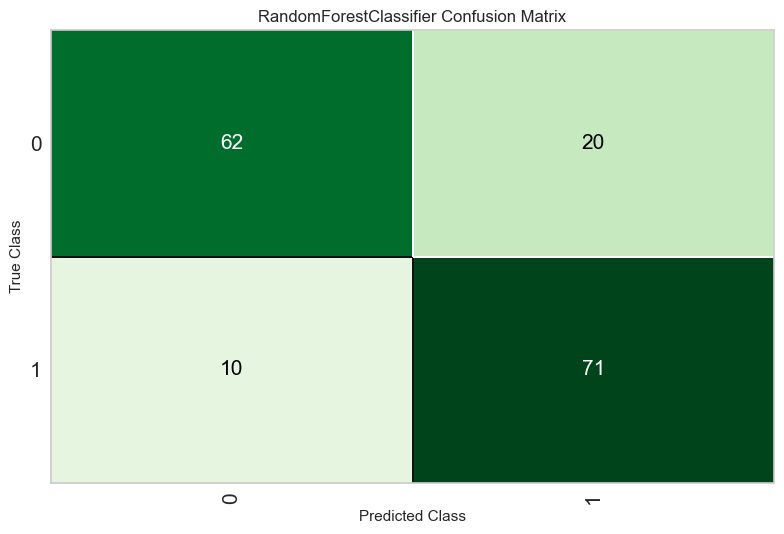

In [40]:
# plot confusion matrix
plot_model(tuned_rf, plot = 'confusion_matrix')

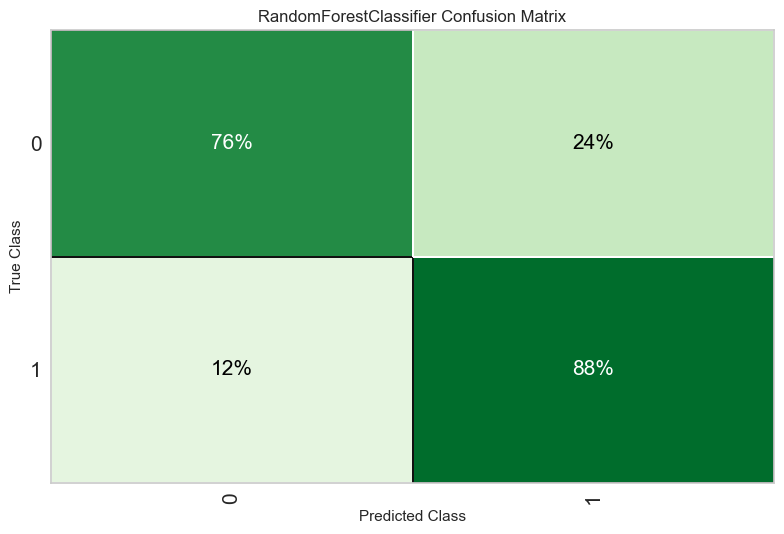

In [41]:
# plot confusion matrix
plot_model(tuned_rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

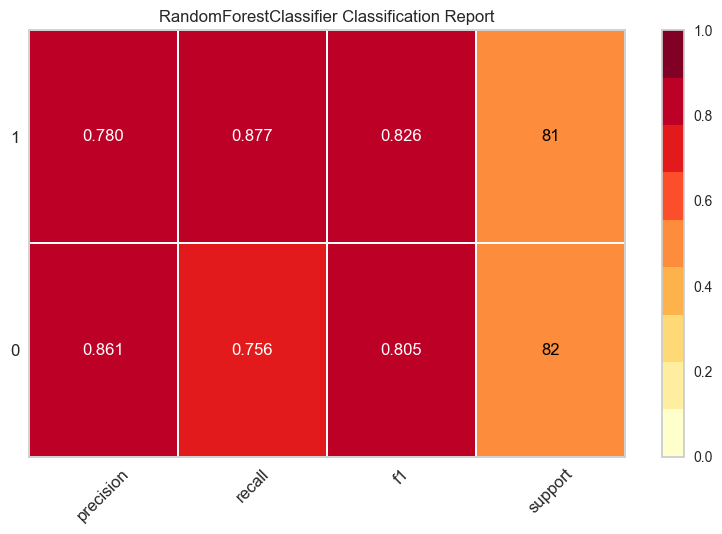

In [42]:
# class report
plot_model(tuned_rf, 'class_report')

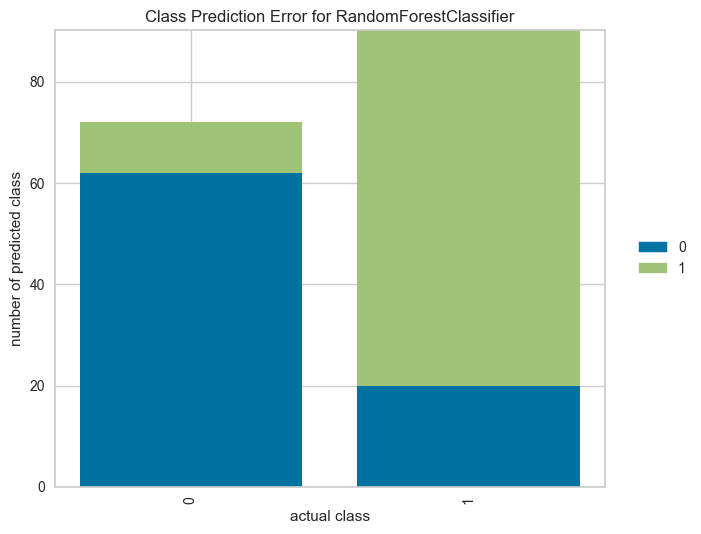

In [44]:
# Class Prediction Error
plot_model(tuned_rf, 'error')

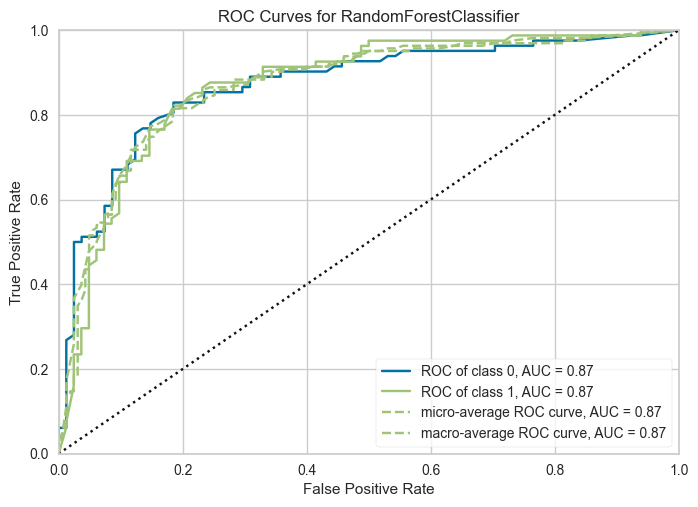

In [45]:
# plot AUC
plot_model(tuned_rf, plot = 'auc')

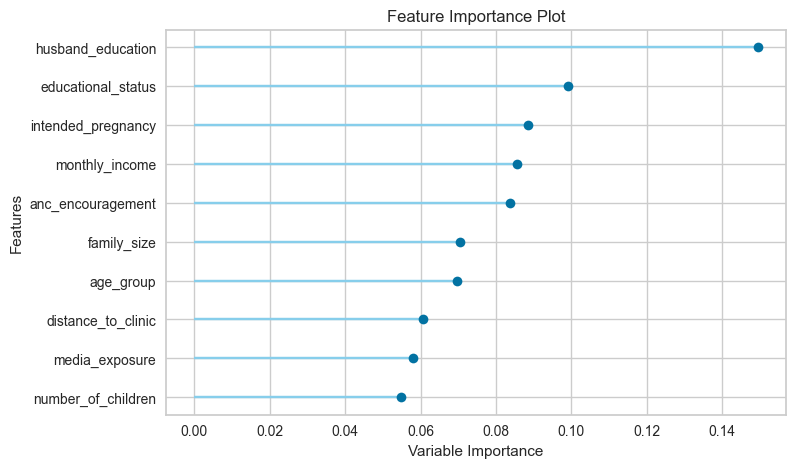

In [46]:
# plot feature importance
plot_model(tuned_rf, plot = 'feature')

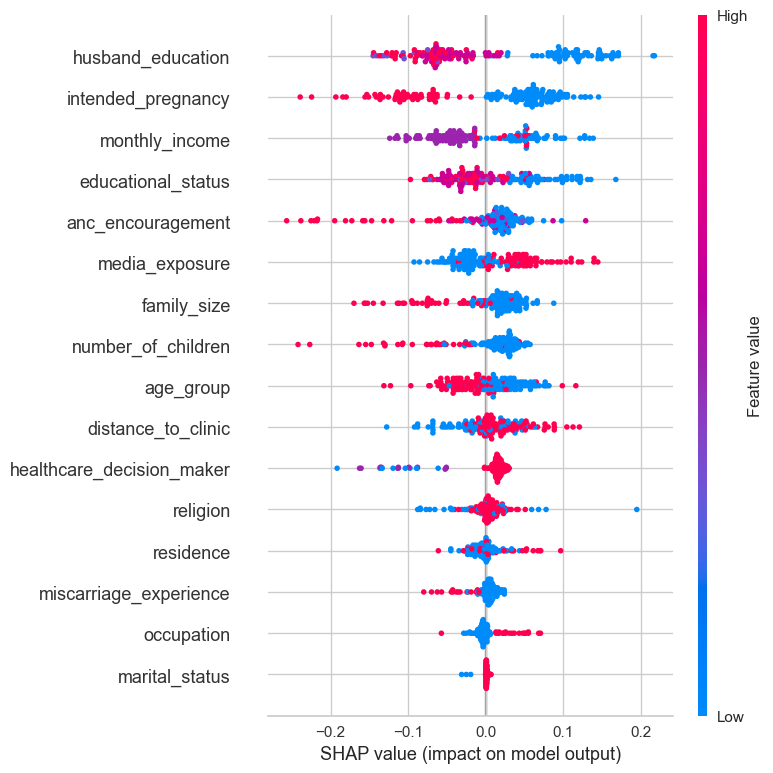

In [47]:
# SHAP analysis
interpret_model(tuned_rf)

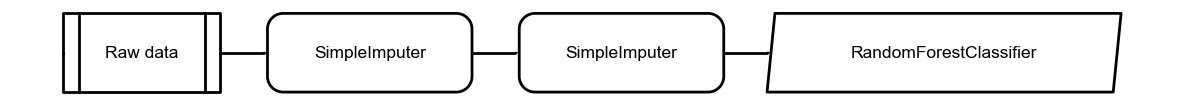

In [48]:
# evaluate the model
evaluate_model(tuned_rf)

In [49]:
# predict on test set
holdout_pred = predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8160,0.8705,0.8765,0.7802,0.8256,0.6322,0.6370


In [50]:
# show predictions df
holdout_pred.head()

,age_group,educational_status,marital_status,residence,religion,monthly_income,occupation,husband_education,media_exposure,distance_to_clinic,anc_encouragement,healthcare_decision_maker,intended_pregnancy,number_of_children,family_size,miscarriage_experience,attended_anc_early,prediction_label,prediction_score
2,0,3,1,0,1,0,0,0,1,1,0,2,1,0,1,0,0,0,0.7317
41,0,3,1,0,2,1,0,0,1,1,3,2,0,0,0,0,0,1,0.5400
118,0,3,1,0,1,1,0,0,0,1,0,2,0,0,0,1,1,1,0.7100
739,1,0,1,1,2,2,0,0,1,0,0,2,0,0,0,0,1,1,0.9835
592,1,2,1,0,2,1,0,2,0,0,0,2,1,1,1,0,0,0,0.8200


In [52]:
# copy data and drop Class variable
new_data = data_smote.copy()
new_data.drop('attended_anc_early', axis=1, inplace=True)
new_data.head()

,age_group,educational_status,marital_status,residence,religion,monthly_income,occupation,husband_education,media_exposure,distance_to_clinic,anc_encouragement,healthcare_decision_maker,intended_pregnancy,number_of_children,family_size,miscarriage_experience
0,0,3,1,0,2,1,0,3,0,1,0,2,0,0,0,0
1,2,2,1,0,2,1,0,2,0,1,0,2,1,1,0,1
2,0,3,1,0,1,0,0,0,1,1,0,2,1,0,1,0
3,1,0,1,0,1,0,1,0,1,1,0,2,0,1,0,0
4,2,2,1,0,2,1,0,2,0,1,0,1,1,1,0,0


In [53]:
# predict model on new_data
predictions = predict_model(tuned_rf, data = new_data)
predictions.head()

,age_group,educational_status,marital_status,residence,religion,monthly_income,occupation,husband_education,media_exposure,distance_to_clinic,anc_encouragement,healthcare_decision_maker,intended_pregnancy,number_of_children,family_size,miscarriage_experience,prediction_label,prediction_score
0,0,3,1,0,2,1,0,3,0,1,0,2,0,0,0,0,0,0.9450
1,2,2,1,0,2,1,0,2,0,1,0,2,1,1,0,1,1,0.6400
2,0,3,1,0,1,0,0,0,1,1,0,2,1,0,1,0,0,0.7317
3,1,0,1,0,1,0,1,0,1,1,0,2,0,1,0,0,1,0.5675
4,2,2,1,0,2,1,0,2,0,1,0,1,1,1,0,0,1,0.5400


In [54]:
final_model = finalize_model(tuned_rf)
save_model(final_model, '../models/ANC_Visits')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age_group', 'educational_status',
                                              'marital_status', 'residence',
                                              'religion', 'monthly_income',
                                              'occupation', 'husband_education',
                                              'media_exposure',
                                              'distance_to_clinic',
                                              'anc_encouragement',
                                              'healthcare_decision_maker',
                                              'intended_pregnancy',
                                              'number_of_ch...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
